In [1]:
import json
import pandas as pd
import numpy as np
import ast
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA

In [2]:
nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

'''
Explicación:
La función nltk.download('punkt') descarga e instala el recurso "punkt" en tu sistema.
Este recurso contiene modelos para la segmentación de frases en diferentes idiomas.
Una vez descargado, el código de preprocesamiento podrá encontrar el recurso y tokenizar las reseñas correctamente.

La función nltk.download('stopwords') descarga e instala el recurso "stopwords" en tu sistema.
Este recurso contiene listas de palabras comunes en diferentes idiomas, que suelen ser poco informativas y se suelen filtrar en el preprocesamiento de texto.
Una vez descargado, el código de preprocesamiento podrá acceder a la lista de stopwords en inglés y realizar la limpieza correctamente.

la función WordNetLemmatizer(), que depende del recurso "wordnet" de NLTK.
Este recurso contiene la base de datos WordNet, que es necesaria para realizar la lematización de palabras en inglés.

nltk.download('omw-1.4') Este comando descargará el recurso necesario para el lematizador de WordNet.
'''

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Grethel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Grethel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Grethel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Grethel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Grethel\AppData\Roaming\nltk_data...
[nltk_d

'\nExplicación:\nLa función nltk.download(\'punkt\') descarga e instala el recurso "punkt" en tu sistema.\nEste recurso contiene modelos para la segmentación de frases en diferentes idiomas.\nUna vez descargado, el código de preprocesamiento podrá encontrar el recurso y tokenizar las reseñas correctamente.\n\nLa función nltk.download(\'stopwords\') descarga e instala el recurso "stopwords" en tu sistema.\nEste recurso contiene listas de palabras comunes en diferentes idiomas, que suelen ser poco informativas y se suelen filtrar en el preprocesamiento de texto.\nUna vez descargado, el código de preprocesamiento podrá acceder a la lista de stopwords en inglés y realizar la limpieza correctamente.\n\nla función WordNetLemmatizer(), que depende del recurso "wordnet" de NLTK.\nEste recurso contiene la base de datos WordNet, que es necesaria para realizar la lematización de palabras en inglés.\n\nnltk.download(\'omw-1.4\') Este comando descargará el recurso necesario para el lematizador de W

In [3]:
Y_ulta_beauty = pd.read_csv('..\datasets\csv\Y_ulta_beauty.csv',encoding='utf-8')
G_ulta_beauty = pd.read_csv('..\datasets\csv\G_ulta_beauty.csv',encoding='utf-8')
G_ulta_beauty.drop(columns=['Unnamed: 0'],inplace=True)
data = pd.concat([G_ulta_beauty, Y_ulta_beauty])



In [4]:
#1. Preprocesamiento de datos:
'''
Limpiar las reseñas: eliminar stopwords, puntuación y caracteres especiales.
Convertir las reseñas a minúsculas.
Lemmatizar las palabras para obtener la raíz.
'''

# Asegúrate de que la columna 'text' no tenga valores nulos
data = data.dropna(subset=['text'])

# Limpiar y lematizar las reseñas
data['reseña_limpia'] = data['text'].apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(word.lower()) for word in word_tokenize(x) if word not in stopwords.words('english') and word.isalnum()]))

# Ejemplo de una reseña preprocesada
data['reseña_limpia'].iloc[0]

'''
En resumen, esta instrucción toma cada reseña, la divide en palabras (tokeniza), lematiza cada palabra, 
filtra las stopwords y caracteres no alfanuméricos, y luego une las palabras procesadas en una nueva cadena de texto, 
que se almacena en la columna 'reseña_limpia'. La columna 'reseña_limpia' contendrá versiones lematizadas y limpias de las reseñas originales.
'''


"\nEn resumen, esta instrucción toma cada reseña, la divide en palabras (tokeniza), lematiza cada palabra, \nfiltra las stopwords y caracteres no alfanuméricos, y luego une las palabras procesadas en una nueva cadena de texto, \nque se almacena en la columna 'reseña_limpia'. La columna 'reseña_limpia' contendrá versiones lematizadas y limpias de las reseñas originales.\n"

In [5]:
data = data[['text','reseña_limpia']]
data

,text,reseña_limpia
0,Both budget priced and high quality cosmetics ...,both budget priced high quality cosmetic offer...
1,"SOMER IS THE BEST STYLIST THEY HAVE, OTHER STY...",somer is the best stylist they have other styl...
2,Very helpful staff. Everyone seemed knowledge...,very helpful staff everyone seemed knowledgeab...
3,Fantastic selection and great staff,fantastic selection great staff
4,Great products!,great product
...,...,...
2027,I don't think I have ever wanted to spend mone...,i think i ever wanted spend money bad could lo...
2028,They have the most horrible stylist ever. I ha...,they horrible stylist ever i picture gave buck...
2029,"I was lucky enough to go to Ulta in Trinity, w...",i lucky enough go ulta trinity i introduced je...
2030,"I love ulta beauty store, they literally sell ...",i love ulta beauty store literally sell everyt...


In [6]:
X = data['reseña_limpia']

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

In [7]:
'''
Estas dos líneas de código están creando y entrenando un modelo LDA con el objetivo de descubrir 10 tópicos latentes 
en un conjunto de documentos representados mediante TF-IDF.
''' 
lda = LatentDirichletAllocation(n_components=10)
lda.fit(X_tfidf)

LatentDirichletAllocation()

In [8]:
temas = lda.components_
palabras_clave = vectorizer.get_feature_names_out()

for i, tema in enumerate(temas):
    print(f'Tema {i + 1}:')
    
    # Obtén los índices de las palabras con los pesos más altos
    palabras_indices = tema.argsort()[:-11:-1]
    
    # Imprime las palabras y sus pesos correspondientes
    for indice in palabras_indices:
        palabra = palabras_clave[indice]
        peso = tema[indice]
        print(f'\tPalabra: {palabra}, Peso: {peso:.2f}')


Tema 1:
	Palabra: store, Peso: 105.64
	Palabra: help, Peso: 103.44
	Palabra: customer, Peso: 93.80
	Palabra: one, Peso: 92.49
	Palabra: ulta, Peso: 89.59
	Palabra: time, Peso: 88.09
	Palabra: like, Peso: 76.07
	Palabra: the, Peso: 74.09
	Palabra: product, Peso: 69.89
	Palabra: never, Peso: 69.49
Tema 2:
	Palabra: everything, Peso: 58.65
	Palabra: good, Peso: 48.08
	Palabra: need, Peso: 38.31
	Palabra: they, Peso: 23.67
	Palabra: beauty, Peso: 21.42
	Palabra: one, Peso: 14.62
	Palabra: price, Peso: 14.31
	Palabra: stop, Peso: 13.75
	Palabra: place, Peso: 13.34
	Palabra: store, Peso: 9.41
Tema 3:
	Palabra: great, Peso: 267.78
	Palabra: service, Peso: 187.99
	Palabra: customer, Peso: 103.95
	Palabra: selection, Peso: 88.05
	Palabra: awesome, Peso: 77.78
	Palabra: product, Peso: 52.22
	Palabra: good, Peso: 50.97
	Palabra: excellent, Peso: 45.94
	Palabra: place, Peso: 44.34
	Palabra: amazing, Peso: 44.09
Tema 4:
	Palabra: product, Peso: 92.05
	Palabra: store, Peso: 84.60
	Palabra: find, Pes

In [9]:
#dio error con PCA
#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X_tfidf)

In [10]:
from sklearn.decomposition import TruncatedSVD

# Número de componentes deseadas
n_components = 2

# Aplicar TruncatedSVD
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X_tfidf)

# X_svd ahora contiene las representaciones de las reseñas en el espacio reducido


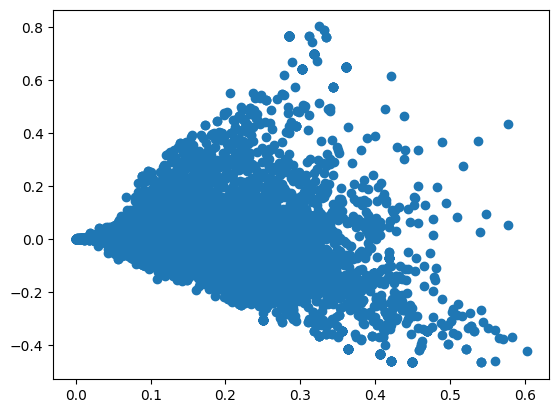

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X_svd[:, 0], X_svd[:, 1])
plt.show()

In [12]:
import shap

# Obtén las probabilidades de los temas para cada reseña
temas_probabilidades = lda.transform(X_tfidf)

# Configura el explainer SHAP
explainer = shap.Explainer(lda)

# Calcula los valores SHAP para las primeras 100 reseñas (puedes ajustar este número según tu dataset)
shap_values = explainer.shap_values(X_tfidf[:100])

# Plotea los valores SHAP
shap.summary_plot(shap_values, X_tfidf[:100], feature_names=vectorizer.get_feature_names_out())


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: LatentDirichletAllocation()

In [21]:
import shap
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus
from nltk.tokenize import word_tokenize
import re

# Entrenar el modelo LDA con Gensim
corpus = Sparse2Corpus(X_tfidf.transpose())
lda_model = LdaModel(corpus, num_topics=10)

# Crear el diccionario id2word
id2word = corpora.Dictionary(data['reseña_limpia'])

# Crear una función de transformación para el modelo LDA
def lda_transform(doc):
    doc = [id2word.doc2bow(doc)]
    return lda_model[doc][0]

# Convertir la matriz X_tfidf a una matriz densa
X_dense = X_tfidf.toarray()

# Configurar el explainer SHAP con la función de transformación
explainer = shap.Explainer(lda_transform, X_dense)  # Utilizar la matriz densa

# Calcular los valores SHAP para las primeras 100 reseñas (ajustar según tu conjunto de datos)
shap_values = explainer.shap_values(X_dense[:100])

# Plotear los valores SHAP
shap.summary_plot(shap_values, X_dense[:100], feature_names=vectorizer.get_feature_names_out())




TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [28]:
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

# Supongamos que 'data' es tu DataFrame con la columna 'reseña_limpia'
# y que está almacenado en la variable 'data'

# Preprocesamiento de datos
stop_words = set(stopwords.words('english'))

tokenized_reviews = [word_tokenize(review) for review in data['reseña_limpia']]
tokenized_reviews = [[word.lower() for word in review if word.isalpha() and word.lower() not in stop_words] for review in tokenized_reviews]

# Creación del diccionario y la matriz de términos-documentos
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(review) for review in tokenized_reviews]

# Aplicación de LDA
num_topics = 5  # Puedes ajustar el número de tópicos según tus necesidades
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
# Imprimir los tópicos identificados de manera estructurada
topics = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)

for i, topic in enumerate(topics):
    topic_num = topic[0]
    topic_words = [word[0] for word in topic[1]]
    print(f"Tópico {topic_num + 1}: {' | '.join(topic_words)}")

# Asignar tópicos a cada reseña en el DataFrame original
data['tema_predicho'] = [max(lda_model[review], key=lambda x: x[1])[0] for review in corpus]


Tópico 1: great | product | staff | store | helpful | friendly | always | selection | nice | beauty
Tópico 2: hair | salon | stylist | cut | appointment | color | back | time | done | wanted
Tópico 3: customer | service | ulta | manager | get | would | product | even | coupon | time
Tópico 4: store | one | ulta | help | like | time | product | employee | location | asked
Tópico 5: love | brow | ulta | place | need | always | go | best | eyebrow | get


Tópico 1: hair | time | back | get | salon | said | would | wanted | appointment | color
Tópico 2: customer | service | ulta | product | help | store | time | employee | experience | manager
Tópico 3: store | product | ulta | staff | helpful | help | always | one | find | need
Tópico 4: great | hair | love | brow | place | amazing | salon | product | service | best
Tópico 5: like | store | u | one | around | makeup | employee | walked | people | time

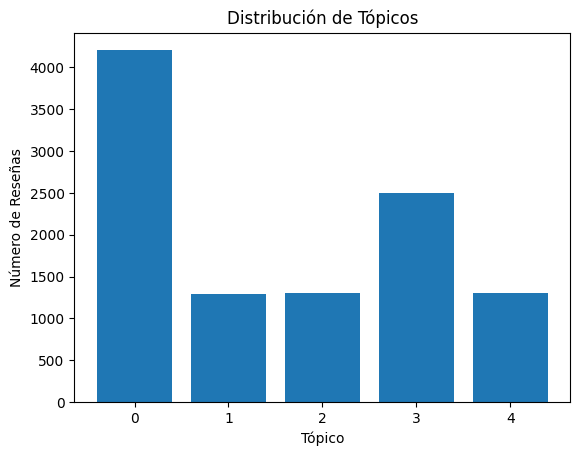

In [29]:
import matplotlib.pyplot as plt

topic_distribution = data['tema_predicho'].value_counts().sort_index()
plt.bar(topic_distribution.index, topic_distribution.values)
plt.xlabel('Tópico')
plt.ylabel('Número de Reseñas')
plt.title('Distribución de Tópicos')
plt.show()
